# Stage-2 Member Task

In [1]:
!pip install plotly

In [606]:
!pip install -U kaleido

In [613]:
conda install -c plotly plotly-orca

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nikit\Anaconda3

  added / updated specs:
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |           py37_0         2.9 MB
    plotly-orca-1.3.1          |                1        56.8 MB  plotly
    ------------------------------------------------------------
                                           Total:        59.7 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/win-64::plotly-orca-1.3.1-1

The following packages will be UPDATED:

  conda                                        4.8.3-py37_0 --> 4.9.0-py37_0




conda-4.9.0          | 2.9 MB    |            |   0% 
conda-4.9.0          | 2.9 MB    |            |   1% 
conda-4.9.0          | 2.9 MB    | #####1     |  52% 
conda-4.9.0          | 2.9 MB    | ########

In [1055]:
#Importing libraries
import pandas as pd
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
from IPython.display import Image

### Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [634]:
# Reading the super covid data
super_data = pd.read_csv("../data/covid_large.csv")

In [635]:
#Converting the datatype to datetime format
super_data['Date'] = super_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [636]:
#Choosing Texas state
state_data_tx=super_data[super_data['State']=='TX']

### Preprocessing data

In [637]:
#Getting the new cases and new deaths column
state_data_tx['Num of Cases Per Day'] = state_data_tx['Num of Cases'].diff()
state_data_tx['Num of Deaths Per Day'] = state_data_tx['Num of Deaths'].diff()
#Removing first date as there are 0 cases on 22nd Jan and the first one will be NaN
state_data_tx = state_data_tx[state_data_tx['Date'] != '2020-01-22']
state_data_tx
#Removing the number of cases and deaths columns as we have new cases and deaths
state_data_tx.drop(['Num of Cases','Num of Deaths'], axis=1, inplace=True)

In [638]:
#5-6 values are negative as the dataset has some values where the Number of cases and deaths decreased(dataset is faulty), 
#so converting them to zero
num = state_data_tx['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = state_data_tx['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [639]:
state_data_tx

,State,countyFIPS,County Name,Date,population,Num of Cases Per Day,Num of Deaths Per Day
608617,TX,0,statewide unallocated,2020-01-23,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0.0,0.0
608621,TX,0,statewide unallocated,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,11840,0.0,0.0


### Groupingby Date to get cases on each day for whole state

In [640]:
f={'Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum','population':'sum','State':'first'}
state_data_tx_date = state_data_tx.groupby("Date").agg(f).reset_index()
state_data_tx_date



,Date,Num of Cases Per Day,Num of Deaths Per Day,population,State
0,2020-01-23,0.0,0.0,28995881,TX
1,2020-01-24,0.0,0.0,28995881,TX
2,2020-01-25,0.0,0.0,28995881,TX
3,2020-01-26,0.0,0.0,28995881,TX
4,2020-01-27,0.0,0.0,28995881,TX
...,...,...,...,...,...
231,2020-09-10,4017.0,161.0,28995881,TX
232,2020-09-11,3508.0,144.0,28995881,TX
233,2020-09-12,4431.0,147.0,28995881,TX
234,2020-09-13,3502.0,47.0,28995881,TX


In [641]:
#Normalising per 1M population 
state_data_tx_date['Num of Cases Per Day Normalized']= (state_data_tx_date['Num of Cases Per Day']/state_data_tx_date['population'])*1000000
state_data_tx_date['Num of Deaths Per Day Normalized']= (state_data_tx_date['Num of Deaths Per Day']/state_data_tx_date['population'])*1000000

state_data_tx_date

,Date,Num of Cases Per Day,Num of Deaths Per Day,population,State,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,0.0,0.0,28995881,TX,0.000000,0.000000
1,2020-01-24,0.0,0.0,28995881,TX,0.000000,0.000000
2,2020-01-25,0.0,0.0,28995881,TX,0.000000,0.000000
3,2020-01-26,0.0,0.0,28995881,TX,0.000000,0.000000
4,2020-01-27,0.0,0.0,28995881,TX,0.000000,0.000000
...,...,...,...,...,...,...,...
231,2020-09-10,4017.0,161.0,28995881,TX,138.536918,5.552513
232,2020-09-11,3508.0,144.0,28995881,TX,120.982701,4.966223
233,2020-09-12,4431.0,147.0,28995881,TX,152.814808,5.069686
234,2020-09-13,3502.0,47.0,28995881,TX,120.775775,1.620920


### Grouping bt Date to get weekly data mean of Cases and Deaths

In [659]:
#Grouping by week and finding the mean for cases and deaths
state_data_groupedByWeak = state_data_tx_date.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean'}).round().reset_index()
state_data_groupedByWeak

,Date,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,0.0,0.0
8,2020-03-22,2.0,0.0
9,2020-03-29,11.0,0.0


In [660]:
#Finding the mean and median for number of cases for all weeks for the state
state_data_groupedByWeak["Num of Cases Per Day Normalized"].agg(["mean","median"]).round()

mean      97.0
median    44.0
Name: Num of Cases Per Day Normalized, dtype: float64

In [661]:
#Finding the mean and median for number of deaths for all weeks for the state
state_data_groupedByWeak["Num of Deaths Per Day Normalized"].agg(["mean","median"]).round()

mean      2.0
median    1.0
Name: Num of Deaths Per Day Normalized, dtype: float64

In [662]:
#Finding the mode for number of deaths for all weeks for the state
state_data_groupedByWeak["Num of Deaths Per Day Normalized"].mode()



0    1.0
dtype: float64

In [663]:
#Finding the mode for number of cases for all weeks for the state
state_data_groupedByWeak["Num of Cases Per Day Normalized"].mode()

0    0.0
dtype: float64

**We can see that Mean, Median and Mode for the 'Number of daily Cases' aren't equal so it is not a normal distribution and since Mean > Median and Mean > Mode, weekly data is positively skewed.**

**We can see that Mean > Median and Mean > Mode for the 'Number of daily Deaths' so it is not a normal distribution and weekly data is skewed.**

###  Compare the data against other states. (normalize by population)

### Loading and preprocessing data

In [665]:
check_population = super_data.groupby(['State',"Date"]).sum().reset_index()

In [666]:
#Checking states and their population
check_population.groupby(['State','population']).size().reset_index().rename(columns={0:'count'}).sort_values('population')

,State,population,count
50,WY,578759,237
46,VT,623989,237
7,DC,705749,237
0,AK,731545,237
28,ND,762062,237
41,SD,884659,237
8,DE,973764,237
39,RI,1059361,237
26,MT,1068778,237
21,ME,1344212,237


In [674]:
#Choosing few states with similar population and few with interesting cases along with our state 'Texas'
state_5_date = super_data[super_data["State"].isin(["TX","MS","FL","NC","NY","PA"])]

In [675]:
#Getting the new cases and new deaths column
state_5_date['Num of Cases Per Day'] = state_5_date['Num of Cases'].diff()
state_5_date['Num of Deaths Per Day'] = state_5_date['Num of Deaths'].diff()

In [676]:
#5-6 values are negative as the dataset has some values where the cases and deaths decreased(dataset is faulty), 
#so converting them to zero
num = state_5_date['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = state_5_date['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0
#Remove first date as there are 0 cases on 22nd Jan and the first one will be NaN when using diff()
state_5_date = state_5_date[state_5_date['Date'] != '2020-01-22']
state_5_date
#Removing the number of cases and deaths columns as we have new cases and deaths
state_5_date.drop(['Num of Cases','Num of Deaths'], axis=1, inplace=True)
state_5_date

,State,countyFIPS,County Name,Date,population,Num of Cases Per Day,Num of Deaths Per Day
78211,FL,0,statewide unallocated,2020-01-23,0,0.0,0.0
78212,FL,0,statewide unallocated,2020-01-24,0,0.0,0.0
78213,FL,0,statewide unallocated,2020-01-25,0,0.0,0.0
78214,FL,0,statewide unallocated,2020-01-26,0,0.0,0.0
78215,FL,0,statewide unallocated,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,11840,0.0,0.0


### Grouping by State, date to get cases on each day for all states

In [678]:
#Grouping by each state and each date to get the total cases in a state for a day
f={'Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum','population':'sum'}
state_5_date = state_5_date.groupby(["State","Date"]).agg(f).reset_index()
state_5_date


,State,Date,Num of Cases Per Day,Num of Deaths Per Day,population
0,FL,2020-01-23,0.0,0.0,21477737
1,FL,2020-01-24,0.0,0.0,21477737
2,FL,2020-01-25,0.0,0.0,21477737
3,FL,2020-01-26,0.0,0.0,21477737
4,FL,2020-01-27,0.0,0.0,21477737
...,...,...,...,...,...
1411,TX,2020-09-10,4017.0,161.0,28995881
1412,TX,2020-09-11,3508.0,144.0,28995881
1413,TX,2020-09-12,4431.0,147.0,28995881
1414,TX,2020-09-13,3502.0,47.0,28995881


### Normalising data

In [681]:
#Normalising per 1M population
state_5_date['Num of Cases Per Day Normalized']= (state_5_date['Num of Cases Per Day']/state_5_date['population'])*1000000
state_5_date['Num of Deaths Per Day Normalized']= (state_5_date['Num of Deaths Per Day']/state_5_date['population'])*1000000
state_5_date

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,population,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,FL,2020-01-23,0.0,0.0,21477737,0.000000,0.000000
1,FL,2020-01-24,0.0,0.0,21477737,0.000000,0.000000
2,FL,2020-01-25,0.0,0.0,21477737,0.000000,0.000000
3,FL,2020-01-26,0.0,0.0,21477737,0.000000,0.000000
4,FL,2020-01-27,0.0,0.0,21477737,0.000000,0.000000
...,...,...,...,...,...,...,...
1411,TX,2020-09-10,4017.0,161.0,28995881,138.536918,5.552513
1412,TX,2020-09-11,3508.0,144.0,28995881,120.982701,4.966223
1413,TX,2020-09-12,4431.0,147.0,28995881,152.814808,5.069686
1414,TX,2020-09-13,3502.0,47.0,28995881,120.775775,1.620920


In [685]:
#Grouping by week
state_mean = state_5_date.groupby(["State",pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean','population':'first'}).round().reset_index()
state_mean

,State,Date,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized,population
0,FL,2020-01-26,0.0,0.0,21477737
1,FL,2020-02-02,0.0,0.0,21477737
2,FL,2020-02-09,0.0,0.0,21477737
3,FL,2020-02-16,0.0,0.0,21477737
4,FL,2020-02-23,0.0,0.0,21477737
...,...,...,...,...,...
205,TX,2020-08-23,211.0,7.0,28995881
206,TX,2020-08-30,159.0,6.0,28995881
207,TX,2020-09-06,141.0,5.0,28995881
208,TX,2020-09-13,115.0,4.0,28995881


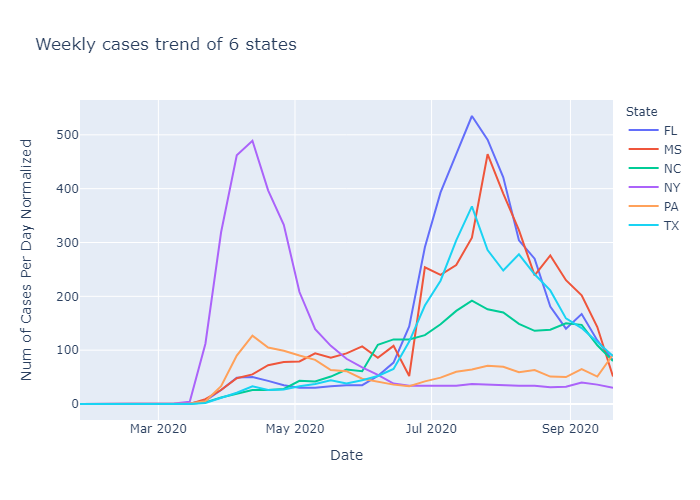

In [1056]:
#All states new cases weekly trend
fig_all_tx = px.line(state_mean, x="Date", y="Num of Cases Per Day Normalized", color='State', title="Weekly cases trend of 6 states")
#fig_all_tx.show()
fig_all_tx.write_image("..images/fig_all_tx.png")
img_bytes = fig_all_tx.to_image(format="png")
Image(img_bytes)

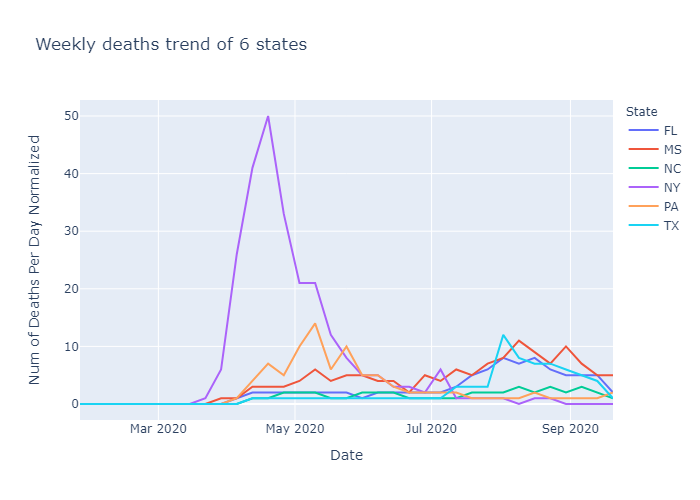

In [1253]:
#All states new deaths weekly trend
fig_all1_tx = px.line(state_mean, x="Date", y="Num of Deaths Per Day Normalized", color='State', title="Weekly deaths trend of 6 states")
#fig_all1_tx.show()
fig_all1_tx.write_image("..images/fig_all1_tx.png")
img_bytes = fig_all1_tx.to_image(format="png")
Image(img_bytes)

In [687]:
#Getting mean and median of cases of all states from all weeks data
cases_stats = state_mean.groupby('State')['Num of Cases Per Day Normalized'].agg(['mean','median']).round().reset_index()
cases_stats

,State,mean,median
0,FL,129.0,49.0
1,MS,125.0,86.0
2,NC,75.0,61.0
3,NY,94.0,34.0
4,PA,49.0,51.0
5,TX,97.0,44.0


In [1250]:
#Getting mode of cases of all states from all weeks data
state_mean.groupby('State')['Num of Cases Per Day Normalized'].agg(pd.Series.mode).reset_index()

,State,Num of Cases Per Day Normalized
0,FL,0.0
1,MS,0.0
2,NC,0.0
3,NY,34.0
4,PA,0.0
5,TX,0.0


**From the above statistics,**
- For the 2nd and 3rd most populated states in US, FL and TX do not have the same stats, Florida has a higher weekly mean of cases that means it has higher cases than Texas in total.
- MS state has almost 1/10th of the population of FL state but they both have the similar weekly mean of cases which means MS state is highly contagious.
- NY and TX are almost of similar population, they are the 2nd and 4th highest populated states in the US and they have a similar weekly mean of number of cases.
- NC has lower population than Texas and it has lesser weekly mean too.
- PA has less than half population of Texas, and the mean of PA is also half of TX so the mean of weekly cases shows that they had cases relative to their population.
- All the states weekly mean cases are positively skewed except for PA since its mean < median it is negatively skewed.
- MS have very low population than TX and has a high weekly mean of cases, so its highly affected state.


In [500]:
#Getting mean and median of deaths of all states from all weeks data
death_stats = state_mean.groupby('State')['Num of Deaths Per Day Normalized'].agg(['mean','median']).round().reset_index()
death_stats

,State,mean,median
0,FL,2.0,2.0
1,MS,4.0,4.0
2,NC,1.0,1.0
3,NY,7.0,1.0
4,PA,3.0,1.0
5,TX,2.0,1.0


In [501]:
#Getting mode of deaths of all states from all weeks data
state_mean.groupby('State')['Num of Deaths Per Day Normalized'].agg(pd.Series.mode)

State
FL    2.0
MS    0.0
NC    2.0
NY    0.0
PA    0.0
TX    1.0
Name: Num of Deaths Per Day Normalized, dtype: float64

**From the above death statistics,**
- FL state weekly death mean=median=mode, so we can say it is normal distribution.
- TX is highly populated than all the other states, but the weekly death mean of PA, NY, MS are higher than TX, which infers that the death rate of the other states were higher.
- MS is highly affected, since the population is 10 times lower than TX but the weekly death mean is high.
- NC has less population than Texas and lower weekly death mean.
- All the other states weekly data except Florida are skewed.

## Identify counties with high case and death rates

In [689]:
#Displaying preprocessed Texas state data
state_data_tx

,State,countyFIPS,County Name,Date,population,Num of Cases Per Day,Num of Deaths Per Day
608617,TX,0,statewide unallocated,2020-01-23,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0.0,0.0
608621,TX,0,statewide unallocated,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,11840,0.0,0.0


In [691]:
#Grouping by county name to get the cases in each county on all the days
f={'countyFIPS':'first','population':'first','Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum'}
state_tx_county=state_data_tx.groupby('County Name').agg(f).reset_index()
state_tx_county


,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day
0,anderson county,48001,57735,2762.0,24.0
1,andrews county,48003,18705,400.0,8.0
2,angelina county,48005,86715,2072.0,77.0
3,aransas county,48007,23510,302.0,18.0
4,archer county,48009,8553,67.0,1.0
...,...,...,...,...,...
250,wood county,48499,45539,452.0,18.0
251,yoakum county,48501,8713,184.0,4.0
252,young county,48503,18010,246.0,6.0
253,zapata county,48505,14179,317.0,5.0


In [692]:
#Removing statewide unallocated as it doesnt have population to normalise on, this data is useful only for 
#statistics on whole state
state_tx_county = state_tx_county[state_tx_county['County Name'] != "statewide unallocated"]

In [694]:
#Normalising cases and deaths of counties per 10000 population
state_tx_county['cases_rate'] = (state_tx_county['Num of Cases Per Day']/state_tx_county['population'])*10000
state_tx_county['deaths_rate'] = (state_tx_county['Num of Deaths Per Day']/state_tx_county['population'])*10000
state_tx_county

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
0,anderson county,48001,57735,2762.0,24.0,478.392656,4.156924
1,andrews county,48003,18705,400.0,8.0,213.846565,4.276931
2,angelina county,48005,86715,2072.0,77.0,238.943666,8.879663
3,aransas county,48007,23510,302.0,18.0,128.455976,7.656316
4,archer county,48009,8553,67.0,1.0,78.335087,1.169180
...,...,...,...,...,...,...,...
250,wood county,48499,45539,452.0,18.0,99.255583,3.952656
251,yoakum county,48501,8713,184.0,4.0,211.178698,4.590841
252,young county,48503,18010,246.0,6.0,136.590783,3.331483
253,zapata county,48505,14179,317.0,5.0,223.570068,3.526342


**Top 5 counties with high cases rate**

In [695]:
#Displaying counties with high case rate
tx_high_case=state_tx_county.sort_values(['cases_rate'],ascending=False).head()
tx_high_case.head()

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
158,maverick county,48323,58722,3535.0,102.0,601.989033,17.369981
245,willacy county,48489,21358,1182.0,46.0,553.422605,21.537597
12,bee county,48025,32565,1798.0,27.0,552.126516,8.291110
170,moore county,48341,20940,1137.0,19.0,542.979943,9.073543
94,hale county,48189,33406,1753.0,49.0,524.756032,14.668024


**Top 5 counties with high deaths rate**

In [696]:
#Displaying counties with high death rate
tx_high_death=state_tx_county.sort_values(['deaths_rate'],ascending=False).head()
tx_high_death.head()

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
23,brooks county,48047,7093,282.0,20.0,397.575074,28.196814
130,kenedy county,48261,404,7.0,1.0,173.267327,24.752475
213,starr county,48427,64633,3278.0,146.0,507.171259,22.589080
137,knox county,48275,3664,67.0,8.0,182.860262,21.834061
245,willacy county,48489,21358,1182.0,46.0,553.422605,21.537597


## Plot daily trends of highly infected counties and state

In [509]:
#Assigning State as Texas to texas data
state_data_tx_date['State']='TX'

In [698]:
state_data_tx_date

,Date,Num of Cases Per Day,Num of Deaths Per Day,population,State,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,0.0,0.0,28995881,TX,0.000000,0.000000
1,2020-01-24,0.0,0.0,28995881,TX,0.000000,0.000000
2,2020-01-25,0.0,0.0,28995881,TX,0.000000,0.000000
3,2020-01-26,0.0,0.0,28995881,TX,0.000000,0.000000
4,2020-01-27,0.0,0.0,28995881,TX,0.000000,0.000000
...,...,...,...,...,...,...,...
231,2020-09-10,4017.0,161.0,28995881,TX,138.536918,5.552513
232,2020-09-11,3508.0,144.0,28995881,TX,120.982701,4.966223
233,2020-09-12,4431.0,147.0,28995881,TX,152.814808,5.069686
234,2020-09-13,3502.0,47.0,28995881,TX,120.775775,1.620920


In [699]:
state_5_date

,State,Date,Num of Cases Per Day,Num of Deaths Per Day,population,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,FL,2020-01-23,0.0,0.0,21477737,0.000000,0.000000
1,FL,2020-01-24,0.0,0.0,21477737,0.000000,0.000000
2,FL,2020-01-25,0.0,0.0,21477737,0.000000,0.000000
3,FL,2020-01-26,0.0,0.0,21477737,0.000000,0.000000
4,FL,2020-01-27,0.0,0.0,21477737,0.000000,0.000000
...,...,...,...,...,...,...,...
1411,TX,2020-09-10,4017.0,161.0,28995881,138.536918,5.552513
1412,TX,2020-09-11,3508.0,144.0,28995881,120.982701,4.966223
1413,TX,2020-09-12,4431.0,147.0,28995881,152.814808,5.069686
1414,TX,2020-09-13,3502.0,47.0,28995881,120.775775,1.620920


In [ ]:
#Creating images folder
if not os.path.exists("images"):
    os.mkdir("images")

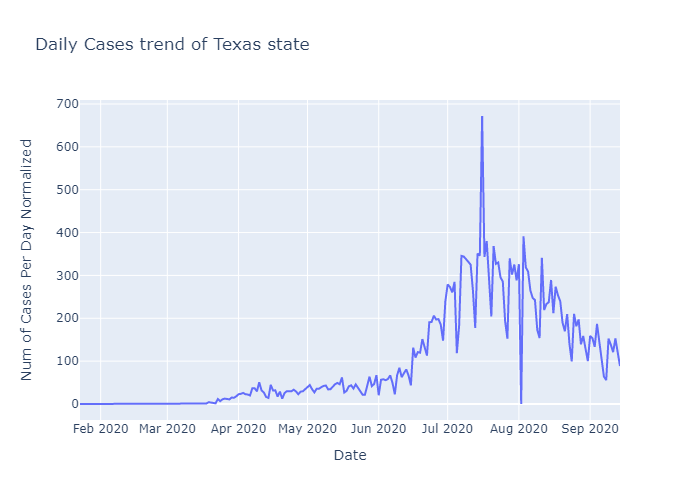

In [1058]:
#Texas state new cases daily trend
fig_tx = px.line(state_data_tx_date, x="Date", y='Num of Cases Per Day Normalized',title='Daily Cases trend of Texas state')
#fig_tx.show()
#Exporting line graph tp images folder
fig_tx.write_image("..images/fig_tx.png")
img_bytes = fig_tx.to_image(format="png")
Image(img_bytes)

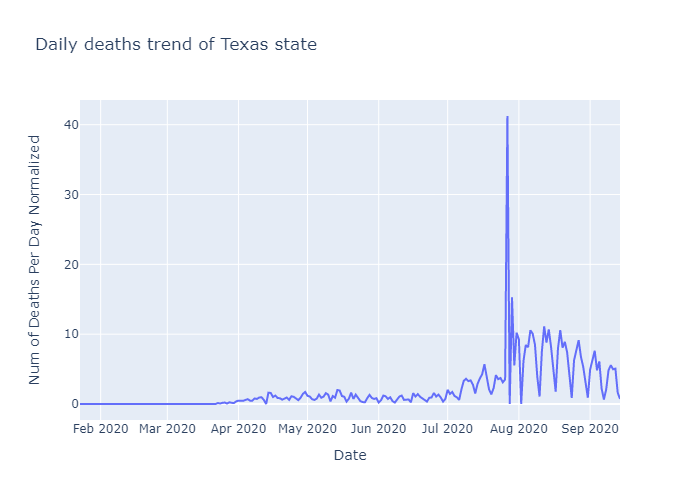

In [1060]:
#Texas state new deaths daily trend
fig1_tx = px.line(state_data_tx_date, x="Date", y='Num of Deaths Per Day Normalized',title='Daily deaths trend of Texas state')
#fig1_tx.show()
fig1_tx.write_image("..images/fig1_tx.png")
img_bytes = fig1_tx.to_image(format="png")
Image(img_bytes)

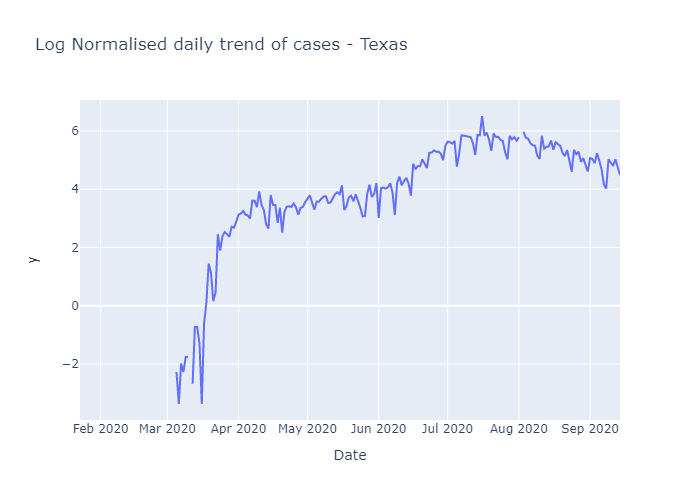

In [1061]:
#Texas state new cases daily trend - log normalised
fig7_tx = px.line(state_data_tx_date, x="Date", y=np.log(state_data_tx_date['Num of Cases Per Day Normalized']),title='Log Normalised daily trend of cases - Texas' )
#fig.show()
#Area where there are gaps in the graph show that there are 0 cases on that day
fig7_tx.write_image("..images/fig7_tx.png")
img_bytes = fig7_tx.to_image(format="png")
Image(img_bytes)

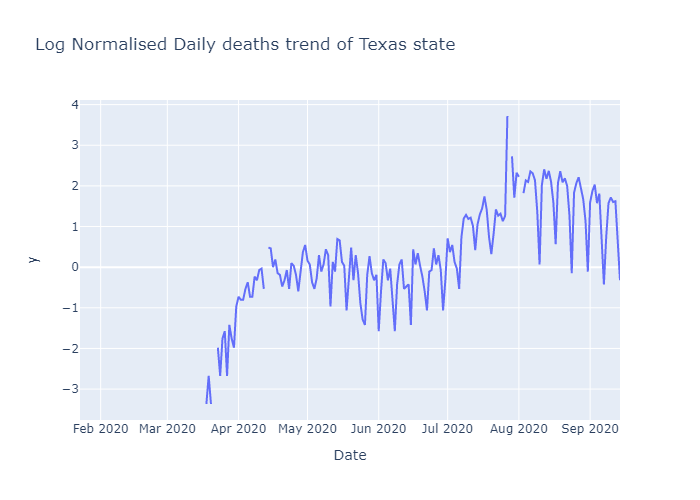

In [1062]:
#Texas state new deaths daily trend
fig9_tx = px.line(state_data_tx_date, x="Date", y=np.log(state_data_tx_date['Num of Deaths Per Day Normalized']),title='Log Normalised Daily deaths trend of Texas state')
#fig1_tx.show()
fig9_tx.write_image("..images/fig9_tx.png")
img_bytes = fig9_tx.to_image(format="png")
Image(img_bytes)

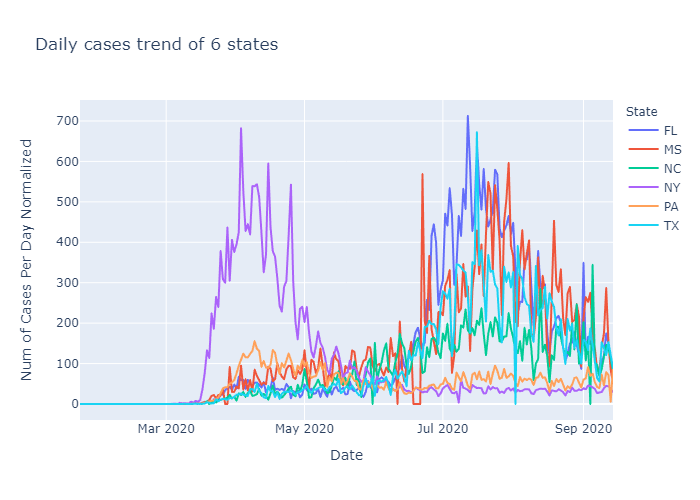

In [1063]:
#All states new cases daily trend
fig_st_tx = px.line(state_5_date, x="Date", y="Num of Cases Per Day Normalized", color='State', title="Daily cases trend of 6 states")
#fig_st_tx.show()
fig_st_tx.write_image("..images/fig_st_tx.png")
img_bytes = fig_st_tx.to_image(format="png")
Image(img_bytes)

**From the above daily trends of cases we can see,**
- Newyork had high case rate in the months of March and April and they started decreasing by mid of May.
- MS state case rate has been increasing and decreasing symmetrically from the month of July.
- Florida had high case rates from the month of July-Sep 1st
- Texas had high peak of cases in the month of July
- NC and PA have been consistent in the rate of cases.
- To be precise all the states have reduced case rates by the 2nd week of September.

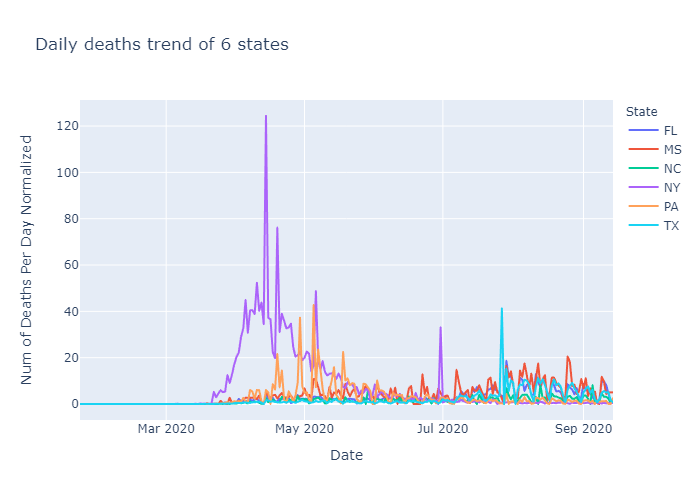

In [1064]:
#All states new deaths daily trend
fig1_st_tx = px.line(state_5_date, x="Date", y="Num of Deaths Per Day Normalized", color='State', title="Daily deaths trend of 6 states")
#fig1_st_tx.show()
fig1_st_tx.write_image("..images/fig1_st_tx.png")
img_bytes = fig1_st_tx.to_image(format="png")
Image(img_bytes)

**From the above daily trends of deaths we can see,**
- Newyork had high death rate in the months of April and May and they started decreasing by end of May.
- MS state death rate has been high in the last week of August.
- Florida had high case rates from the month of July-Sep 1st
- Texas had high peak of death rate in the month of July
- PA death rate has been high in May.
- NC had low death rates throughout.
- To be precise all the states have reduced death rates by the 2nd week of September.

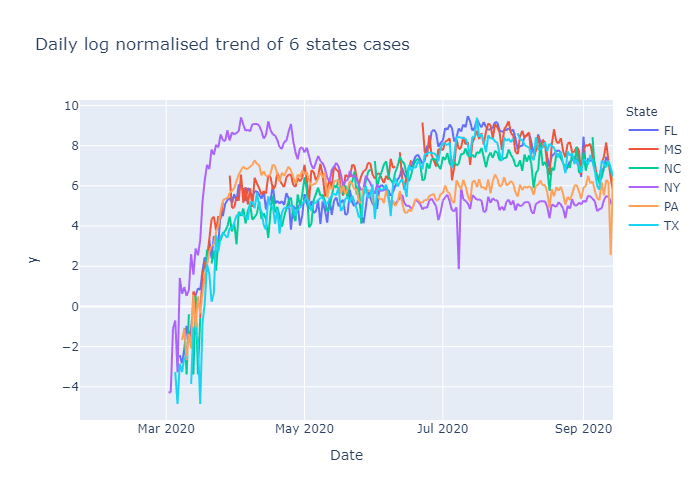

In [1065]:
#All states new cases daily trend - log normalised
fig2_st_tx = px.line(state_5_date, x="Date", y=np.log2(state_5_date['Num of Cases Per Day Normalized']), color='State', title="Daily log normalised trend of 6 states cases")
#fig2_st_tx.show()
fig2_st_tx.write_image("..images/fig2_st_tx.png")
img_bytes = fig2_st_tx.to_image(format="png")
Image(img_bytes)

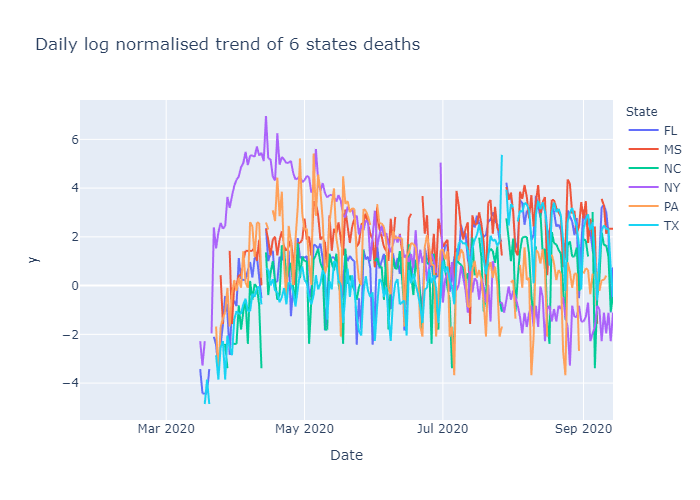

In [1066]:
#All states new deaths daily trend - log normalised
fig9_st_tx = px.line(state_5_date, x="Date", y=np.log2(state_5_date['Num of Deaths Per Day Normalized']), color='State', title="Daily log normalised trend of 6 states deaths")
#fig2_st_tx.show()
fig9_st_tx.write_image("..images/fig9_st_tx.png")
img_bytes = fig9_st_tx.to_image(format="png")
Image(img_bytes)

### Top 5 Counties daily trend in Texas state

In [706]:
state_tx_county

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
0,anderson county,48001,57735,2762.0,24.0,478.392656,4.156924
1,andrews county,48003,18705,400.0,8.0,213.846565,4.276931
2,angelina county,48005,86715,2072.0,77.0,238.943666,8.879663
3,aransas county,48007,23510,302.0,18.0,128.455976,7.656316
4,archer county,48009,8553,67.0,1.0,78.335087,1.169180
...,...,...,...,...,...,...,...
250,wood county,48499,45539,452.0,18.0,99.255583,3.952656
251,yoakum county,48501,8713,184.0,4.0,211.178698,4.590841
252,young county,48503,18010,246.0,6.0,136.590783,3.331483
253,zapata county,48505,14179,317.0,5.0,223.570068,3.526342


In [707]:
state_data_tx

,State,countyFIPS,County Name,Date,population,Num of Cases Per Day,Num of Deaths Per Day
608617,TX,0,statewide unallocated,2020-01-23,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0.0,0.0
608621,TX,0,statewide unallocated,2020-01-27,0,0.0,0.0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,11840,0.0,0.0


In [714]:
#Removing statewide unallocated as it doesnt have population to normalise on, this data is useful only for 
#statistics on whole state
state_data_tx = state_data_tx[state_data_tx['County Name'] != "statewide unallocated"]

In [715]:
#Normalising cases and deaths of counties per 10000 population
state_data_tx['Num of Cases Per Day Normalized'] = (state_data_tx['Num of Cases Per Day']/state_data_tx['population'])*10000
state_data_tx['Num of Deaths Per Day Normalized']= (state_data_tx['Num of Deaths Per Day']/state_data_tx['population'])*10000

In [716]:
state_data_tx

,State,countyFIPS,County Name,Date,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
608854,TX,48001,anderson county,2020-01-23,57735,0.0,0.0,0.000000,0.000000
608855,TX,48001,anderson county,2020-01-24,57735,0.0,0.0,0.000000,0.000000
608856,TX,48001,anderson county,2020-01-25,57735,0.0,0.0,0.000000,0.000000
608857,TX,48001,anderson county,2020-01-26,57735,0.0,0.0,0.000000,0.000000
608858,TX,48001,anderson county,2020-01-27,57735,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,11840,2.0,0.0,1.689189,0.000000
669047,TX,48507,zavala county,2020-09-11,11840,1.0,1.0,0.844595,0.844595
669048,TX,48507,zavala county,2020-09-12,11840,7.0,0.0,5.912162,0.000000
669049,TX,48507,zavala county,2020-09-13,11840,0.0,0.0,0.000000,0.000000


In [725]:
tx_high_case

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
158,maverick county,48323,58722,3535.0,102.0,601.989033,17.369981
245,willacy county,48489,21358,1182.0,46.0,553.422605,21.537597
12,bee county,48025,32565,1798.0,27.0,552.126516,8.291110
170,moore county,48341,20940,1137.0,19.0,542.979943,9.073543
94,hale county,48189,33406,1753.0,49.0,524.756032,14.668024


In [720]:
#Getting a dataframe of 5 high case rate counties
high_infect_case_rate_df=state_data_tx[state_data_tx["County Name"].isin(tx_high_case['County Name'])]

In [726]:
tx_high_death

,County Name,countyFIPS,population,Num of Cases Per Day,Num of Deaths Per Day,cases_rate,deaths_rate
23,brooks county,48047,7093,282.0,20.0,397.575074,28.196814
130,kenedy county,48261,404,7.0,1.0,173.267327,24.752475
213,starr county,48427,64633,3278.0,146.0,507.171259,22.589080
137,knox county,48275,3664,67.0,8.0,182.860262,21.834061
245,willacy county,48489,21358,1182.0,46.0,553.422605,21.537597


In [722]:
#Getting a dataframe of 5 high death rate counties
high_infect_death_rate_df=state_data_tx[state_data_tx["County Name"].isin(tx_high_death['County Name'])]

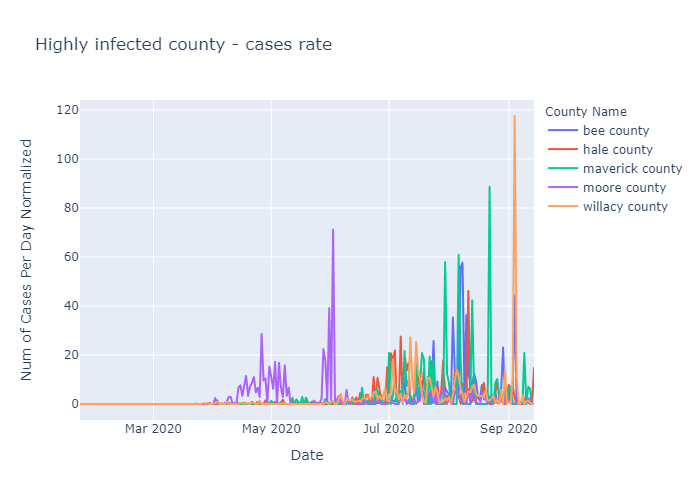

In [1067]:
#Daily trend of 5 highy infected counties - cases
fig3_tx = px.line(high_infect_case_rate_df, x="Date", y="Num of Cases Per Day Normalized", color='County Name', title='Highly infected county - cases rate')
#fig3_tx.show()
fig3_tx.write_image("..images/fig3_tx.png")
img_bytes = fig3_tx.to_image(format="png")
Image(img_bytes)

**From the above daily trends of cases rate,**
- Moore county had high case rate from Apr mid till the month of June and then decreased.
- Bee and Maverick counties had high case rate from July to September.
- Willacy county had high case rate in July and then decreased and had a peak in September.
- Hale had its peak in August.

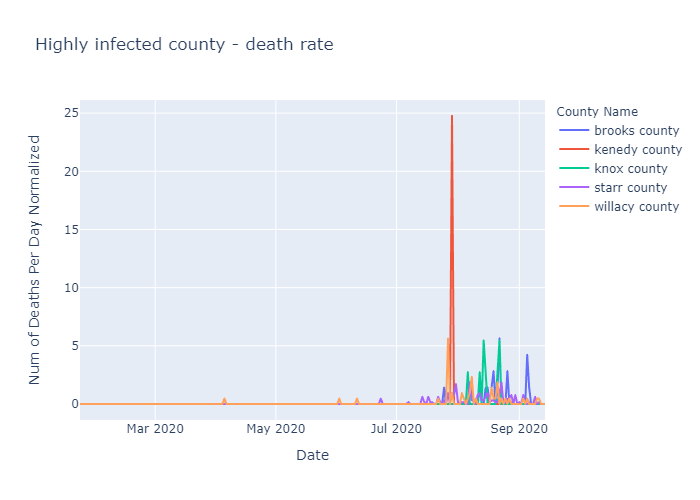

In [1068]:
#Daily trend of 5 highy infected counties - deaths
fig4_tx = px.line(high_infect_death_rate_df, x="Date", y="Num of Deaths Per Day Normalized", color='County Name', title='Highly infected county - death rate')
#fig4_tx.show()
fig4_tx.write_image("..images/fig4_tx.png")
img_bytes = fig4_tx.to_image(format="png")
Image(img_bytes)

**From the above daily trends of death rates,**
- Brooks county death rate has been increasing gradually from August mid till date(Sep 14th).
- Willacy county had its peak death rate in August and is decreasing gradually.
- Starr county has has almost the saem death rate since August.
- Knox county had high death rate in August and then decreased.
- Kenedy county had its peak in August.

### Fit a distribution to the number of COVID-19 cases of a state

In [1237]:
#Choosing Texas state data
df=super_data.loc[super_data['State'] == 'TX']

In [1238]:
#Getting new cases and deaths fir each day
df['Num of Cases Per Day'] = df['Num of Cases'].diff()
df['Num of Deaths Per Day'] = df['Num of Deaths'].diff()
df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
608616,TX,0,statewide unallocated,2020-01-22,0,0,0,NaN,NaN
608617,TX,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,275,14,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,282,14,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,282,14,11840,0.0,0.0


In [1239]:
#Remove first date as diff gives NaN for the first row 
df = df[df['Date'] != '2020-01-22']
df


,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
608617,TX,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
608621,TX,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,275,14,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,282,14,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,282,14,11840,0.0,0.0


In [1240]:
#5-6 values are negative as the dataset has some values where the cases and deaths decreased(dataset is faulty), 
#so converting them to zero
num = df['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = df['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0
df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
608617,TX,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
608618,TX,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
608619,TX,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
608620,TX,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
608621,TX,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,275,14,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,282,14,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,282,14,11840,0.0,0.0


In [1241]:
#Removing statewide unallocated as it doesnt have population to normalise on, this data is useful only for 
#statistics on whole state
df = df[df['County Name'] != "statewide unallocated"]

In [1242]:
#Normalising per 10000 population
df['Num of Cases Per Day Normalized'] = ((df['Num of Cases Per Day']/df['population'])*10000)
df['Num of Deaths Per Day Normalized'] = ((df['Num of Deaths Per Day']/df['population'])*10000)
df

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
608854,TX,48001,anderson county,2020-01-23,0,0,57735,0.0,0.0,0.000000,0.000000
608855,TX,48001,anderson county,2020-01-24,0,0,57735,0.0,0.0,0.000000,0.000000
608856,TX,48001,anderson county,2020-01-25,0,0,57735,0.0,0.0,0.000000,0.000000
608857,TX,48001,anderson county,2020-01-26,0,0,57735,0.0,0.0,0.000000,0.000000
608858,TX,48001,anderson county,2020-01-27,0,0,57735,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840,2.0,0.0,1.689189,0.000000
669047,TX,48507,zavala county,2020-09-11,275,14,11840,1.0,1.0,0.844595,0.844595
669048,TX,48507,zavala county,2020-09-12,282,14,11840,7.0,0.0,5.912162,0.000000
669049,TX,48507,zavala county,2020-09-13,282,14,11840,0.0,0.0,0.000000,0.000000


In [1243]:
#Grouping by State and Date and summing up the cases, deaths to get cases and deaths of each day for the whole state
f={'population':'sum','Num of Cases Per Day':'sum','Num of Deaths Per Day Normalized':'sum','Num of Cases Per Day Normalized':'sum','Num of Deaths Per Day':'sum'}
state_data_tx = df.groupby(["State","Date"]).agg(f).round().reset_index()
state_data_tx


,State,Date,population,Num of Cases Per Day,Num of Deaths Per Day Normalized,Num of Cases Per Day Normalized,Num of Deaths Per Day
0,TX,2020-01-23,28995881,0.0,0.0,0.0,0.0
1,TX,2020-01-24,28995881,0.0,0.0,0.0,0.0
2,TX,2020-01-25,28995881,0.0,0.0,0.0,0.0
3,TX,2020-01-26,28995881,0.0,0.0,0.0,0.0
4,TX,2020-01-27,28995881,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
231,TX,2020-09-10,28995881,4017.0,27.0,330.0,161.0
232,TX,2020-09-11,28995881,3508.0,21.0,381.0,144.0
233,TX,2020-09-12,28995881,4431.0,16.0,345.0,147.0
234,TX,2020-09-13,28995881,3502.0,6.0,80.0,47.0


In [1244]:
#Setting Date column as index
df=df.set_index('Date')

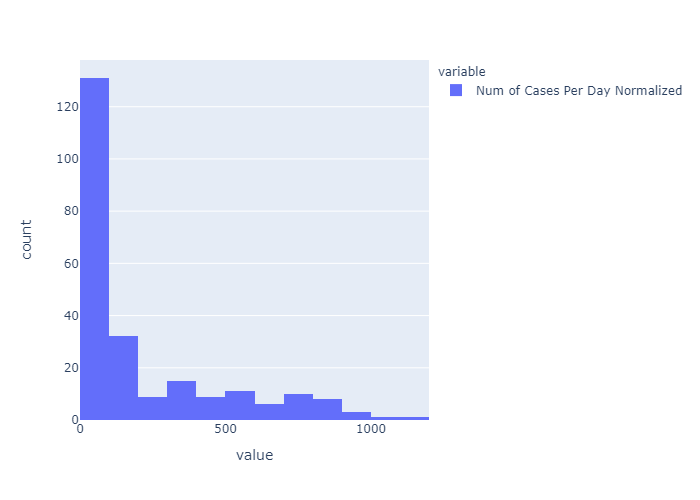

In [1246]:
#Plotting histogram for the normalised daily cases and number of occurences
x = state_data_tx['Num of Cases Per Day Normalized']

fig_hist_tx = px.histogram(x, nbins=20)
#fig_hist_tx.show()
fig_hist_tx.write_image("..images/fig_hist_tx.png")
img_bytes = fig_hist_tx.to_image(format="png")
Image(img_bytes)

Mean: 205.20762711864407 
Median:  76.5 
Mode:  0.0


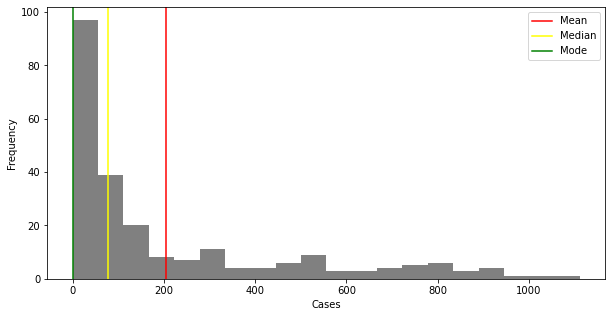

In [1247]:
#Mean, median and mode graph
mean=x.mean()
median=x.median()
mode=x.mode()

print('Mean:',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(x,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Mean, Median

In [1229]:
state_stats = state_data_tx["Num of Cases Per Day Normalized"].agg(["mean","median"]).round()
state_stats


mean      205.0
median     76.0
Name: Num of Cases Per Day Normalized, dtype: float64

#### Skewness

In [1230]:
state_data_tx["Num of Cases Per Day Normalized"].skew()

1.4404417960889893

#### Kurtosis

In [1231]:
state_data_tx["Num of Cases Per Day Normalized"].kurt()

0.9841217963066313

#### Variance

In [1232]:
state_data_tx["Num of Cases Per Day Normalized"].var()

72970.48862243061

In [1233]:
state_data_tx["Num of Cases Per Day Normalized"].describe()

count     236.000000
mean      205.207627
std       270.130503
min         0.000000
25%         3.500000
50%        76.500000
75%       320.500000
max      1112.000000
Name: Num of Cases Per Day Normalized, dtype: float64

**Points from the histogram**
- Since Mean is greater than Median the distribution is not normal and it is positively skewed with a tail on the right as we can see in the histogram too.
- Since the tail is on the right side of the distribution is longer the data is positively skewed and as the skewness is >1 we can say it is highly skewed.
- Kurtosis says about the tail of this distribution not the skewness or flatnes. It measures the outliers present in the distribution. Since we have low kurtosis value which is <3, we can say that the data does not have much outliers which is true in this case as the cases wouldn't be too high.
- We can see that we have high variance which indicates that the number of cases are very spread out from the mean, and from one another.

**Distribution**
- We can see the values(Number of Cases Per Day) are discrete and a discrete probability distribution  expresses the probability of a given number of events occurring in a fixed interval of time, so here we have the number of times specific number of cases occured in a day. And we can see that the data is left-skewed with the tail to the right. Taking all these points into consideration i feel the Texas state data follows **Poisson distribution**.

#### Poisson distribution calculating pmf and plotting 

In [1234]:
#Taking the mean of cases of Texas state as lambda and calculating pmf for 'k' values for the cases taking bin values as range
k=range(0,700,100) #Taking the bin range from the histogram as k values
lamb = state_stats['mean']
p_list=[]
for i in k:
    p=poisson.pmf(k=i,     
    mu=lamb)   
    p_list.append(p)



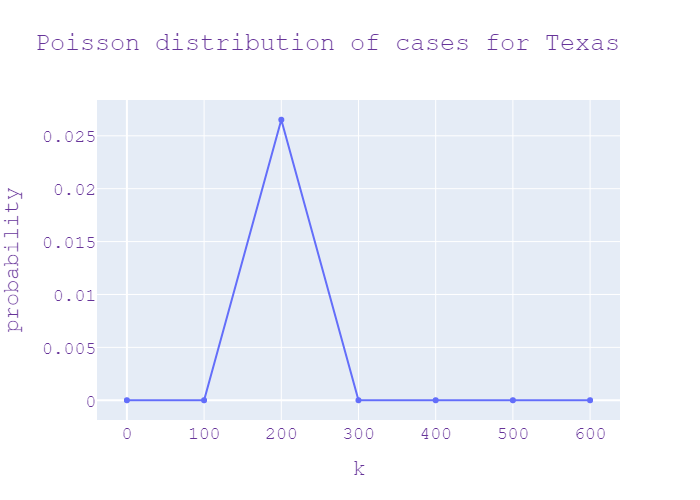

In [1235]:
#Plotting the line graph of each state Poisson distribution with k as X-axis and cases probability as Y-axis

fig_pois_tx = go.Figure()
#lamb = state_stats['mean']
fig_pois_tx.add_trace(
    go.Scatter( 
    
        x=list(k),
        y=p_list  
        ))
fig_pois_tx.update_layout(
title="Poisson distribution of cases for Texas",
xaxis_title="k",
yaxis_title="probability" ,font=dict(
family="Courier New, monospace",
size=18,
color="RebeccaPurple"
))

#fig_pois_tx.show()
fig_pois_tx.write_image("images/fig_pois_tx.png")
img_bytes = fig_pois_tx.to_image(format="png")
Image(img_bytes)

### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. 

In [1092]:
#Choosing 5 states data along with Texas state
state_5_poisson = super_data[super_data["State"].isin(["TX","MS","FL","NC","NY","PA"])]
state_5_poisson

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
78210,FL,0,statewide unallocated,2020-01-22,0,0,0
78211,FL,0,statewide unallocated,2020-01-23,0,0,0
78212,FL,0,statewide unallocated,2020-01-24,0,0,0
78213,FL,0,statewide unallocated,2020-01-25,0,0,0
78214,FL,0,statewide unallocated,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840
669047,TX,48507,zavala county,2020-09-11,275,14,11840
669048,TX,48507,zavala county,2020-09-12,282,14,11840
669049,TX,48507,zavala county,2020-09-13,282,14,11840


In [1093]:
#Getting new cases and new deaths per day and adding a column
state_5_poisson['Num of Cases Per Day'] = state_5_poisson['Num of Cases'].diff()
state_5_poisson['Num of Deaths Per Day'] = state_5_poisson['Num of Deaths'].diff()
#Remove first date as there are no cases on 22nd and while using diff the 1st value would be NaN
state_5_poisson = state_5_poisson[state_5_poisson['Date'] != '2020-01-22']
state_5_poisson

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
78211,FL,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
78212,FL,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
78213,FL,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
78214,FL,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
78215,FL,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
669046,TX,48507,zavala county,2020-09-10,274,13,11840,2.0,0.0
669047,TX,48507,zavala county,2020-09-11,275,14,11840,1.0,1.0
669048,TX,48507,zavala county,2020-09-12,282,14,11840,7.0,0.0
669049,TX,48507,zavala county,2020-09-13,282,14,11840,0.0,0.0


In [1094]:
#5-6 values are negative as the dataset has some values where the cases and deaths decreased(dataset is faulty), 
#so converting them to zero
num = state_5_poisson['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = state_5_poisson['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [1095]:
#Grouping by State and Date and summing up the cases, deaths to get cases and deaths of each day for the whole state
f={'population':'sum','Num of Cases Per Day':'sum','Num of Deaths Per Day':'sum'}
state_5_week = state_5_poisson.groupby(["State","Date"]).agg(f).reset_index()
state_5_week

,State,Date,population,Num of Cases Per Day,Num of Deaths Per Day
0,FL,2020-01-23,21477737,0.0,0.0
1,FL,2020-01-24,21477737,0.0,0.0
2,FL,2020-01-25,21477737,0.0,0.0
3,FL,2020-01-26,21477737,0.0,0.0
4,FL,2020-01-27,21477737,0.0,0.0
...,...,...,...,...,...
1411,TX,2020-09-10,28995881,4017.0,161.0
1412,TX,2020-09-11,28995881,3508.0,144.0
1413,TX,2020-09-12,28995881,4431.0,147.0
1414,TX,2020-09-13,28995881,3502.0,47.0


In [1096]:
#Normalising per 1M population
state_5_week['Num of Cases Per Day Normalized'] = ((state_5_week['Num of Cases Per Day']/state_5_week['population'])*1000000)
state_5_week['Num of Deaths Per Day Normalized'] = ((state_5_week['Num of Deaths Per Day']/state_5_week['population'])*1000000)
state_5_week

,State,Date,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,FL,2020-01-23,21477737,0.0,0.0,0.000000,0.000000
1,FL,2020-01-24,21477737,0.0,0.0,0.000000,0.000000
2,FL,2020-01-25,21477737,0.0,0.0,0.000000,0.000000
3,FL,2020-01-26,21477737,0.0,0.0,0.000000,0.000000
4,FL,2020-01-27,21477737,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
1411,TX,2020-09-10,28995881,4017.0,161.0,138.536918,5.552513
1412,TX,2020-09-11,28995881,3508.0,144.0,120.982701,4.966223
1413,TX,2020-09-12,28995881,4431.0,147.0,152.814808,5.069686
1414,TX,2020-09-13,28995881,3502.0,47.0,120.775775,1.620920


In [1097]:
#Grouping by state and getting the mean of Cases and Deaths of each day 
state_5_stats = state_5_week.groupby(["State"])[('Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized')].mean().round().reset_index()
state_5_stats

,State,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,FL,131.0,2.0
1,MS,128.0,4.0
2,NC,76.0,1.0
3,NY,97.0,7.0
4,PA,48.0,3.0
5,TX,99.0,2.0


In [1098]:
#Taking the mean of cases of each state as lambda and calculating pmf for same 'k' values for the cases
k=range(0,150,10)
pf_dict = {}
for lamb in state_5_stats['Num of Cases Per Day Normalized']:
    p_list=[]
    for i in k:
        p=poisson.pmf(k=i,     
        mu=lamb)   
        p_list.append(p)
    pf_dict[lamb]=p_list


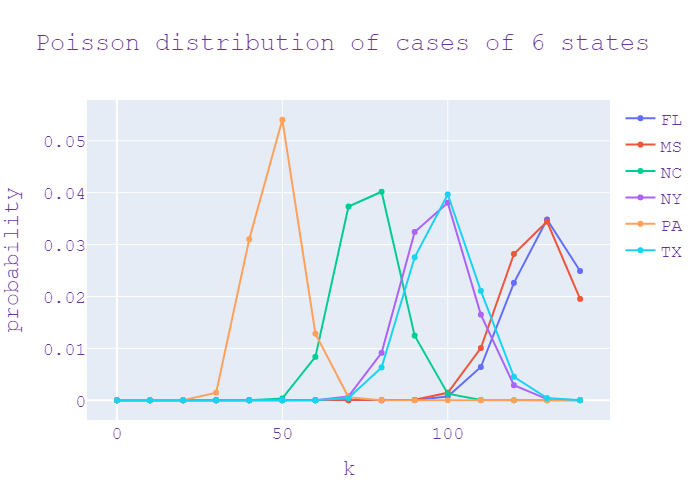

In [1099]:
#Plotting the line graph of each state Poisson distribution with k as X-axis and cases probability as Y-axis

fig_poisson_tx = go.Figure()
for lamb,state in zip(state_5_stats['Num of Cases Per Day Normalized'],state_5_stats['State']):
    fig_poisson_tx.add_trace(
        go.Scatter( 
            name=state,
            x=list(k),
            y=pf_dict[lamb]  
        ))
    fig_poisson_tx.update_layout(
    title="Poisson distribution of cases of 6 states",
    xaxis_title="k",
    yaxis_title="probability" ,font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

#fig_poisson_tx.show()
fig_poisson_tx.write_image("..images/fig_poisson_tx.png")
img_bytes = fig_poisson_tx.to_image(format="png")
Image(img_bytes)

**From the poisson distribution graph,**
- PA state has more probabity of getting low cases per day(~50 normalised).
- MS and FL states have more probability of getting high number of cases per day(~130 normalised).
- NY and TX have probability of getting ~100 cases per day normalised.
- NC has probability of getting ~80 cases per day normalised.


In [767]:
#Taking the death mean of each state as lambda and calculating pmf for same 'k' values for the deaths
k=range(0,9,1)
pf_dict_death = {}
for lamb in state_5_stats['Num of Deaths Per Day Normalized']:
    p_list_death=[]
    for i in k:
        p=poisson.pmf(k=i,    
        mu=lamb)   
        p_list_death.append(p)
    pf_dict_death[lamb]=p_list_death


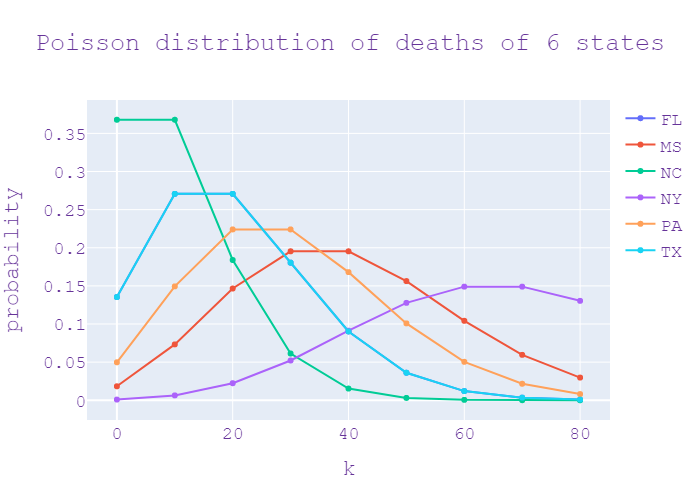

In [1100]:
#Plotting the line graph of each state Poisson distribution with k as X-axis and death probability as Y-axis
fig1_poisson_tx = go.Figure()
for lamb,state in zip(state_5_stats['Num of Deaths Per Day Normalized'],state_5_stats['State']):
    fig1_poisson_tx.add_trace(
        go.Scatter(
            name = state,
            x=list(k),
            y=pf_dict_death[lamb]  
        ))
fig1_poisson_tx.update_layout(
    title="Poisson distribution of deaths of 6 states",
    xaxis_title="k",
    yaxis_title="probability" ,font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

# fig1_poisson_tx.show()
fig1_poisson_tx.write_image(".images/fig1_poisson_tx.png")
img_bytes = fig1_poisson_tx.to_image(format="png")
Image(img_bytes)

**From the poisson distribution graph,**

- MS has more probability of getting 3-4 deaths per day normalised.
- PA has more probability of getting 2-3 deaths per day normalised.
- FL and TX have more probability of getting 1-2 deaths per day normalised.
- NC has more probability of getting 0-1 deaths per day normalised.
- NY has more probability of getting 6-7 deaths per day normalised.


### Model poission distributions for North Carolina counties COVID-19 in cases and deaths.

In [1101]:
#Choosing NC state from the super data
nc_state_possion = super_data[super_data["State"].isin(["NC"])]
nc_state_possion

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
456225,NC,0,statewide unallocated,2020-01-22,0,0,0
456226,NC,0,statewide unallocated,2020-01-23,0,0,0
456227,NC,0,statewide unallocated,2020-01-24,0,0,0
456228,NC,0,statewide unallocated,2020-01-25,0,0,0
456229,NC,0,statewide unallocated,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
480157,NC,37199,yancey county,2020-09-10,110,0,18069
480158,NC,37199,yancey county,2020-09-11,112,0,18069
480159,NC,37199,yancey county,2020-09-12,113,0,18069
480160,NC,37199,yancey county,2020-09-13,114,0,18069


In [1102]:
#Getting new cases and new deaths per day and adding a column
nc_state_possion['Num of Cases Per Day'] = nc_state_possion['Num of Cases'].diff()
nc_state_possion['Num of Deaths Per Day'] = nc_state_possion['Num of Deaths'].diff()
#Remove first date as there are no cases on 22nd and while using diff the 1st value would be NaN
nc_state_possion = nc_state_possion[nc_state_possion['Date'] != '2020-01-22']
nc_state_possion

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
456226,NC,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
456227,NC,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
456228,NC,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
456229,NC,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
456230,NC,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
480157,NC,37199,yancey county,2020-09-10,110,0,18069,2.0,0.0
480158,NC,37199,yancey county,2020-09-11,112,0,18069,2.0,0.0
480159,NC,37199,yancey county,2020-09-12,113,0,18069,1.0,0.0
480160,NC,37199,yancey county,2020-09-13,114,0,18069,1.0,0.0


In [1103]:
#5-6 values are negative as the dataset has some values where the cases and deaths decreased(dataset is faulty), 
#so converting them to zero
num = nc_state_possion['Num of Cases Per Day']._get_numeric_data()
num[num < 0] = 0
num1 = nc_state_possion['Num of Deaths Per Day']._get_numeric_data()
num1[num1 < 0] = 0

In [1104]:
#Normalising per 1M population
nc_state_possion['Num of Cases Per Day Normalized']= (nc_state_possion['Num of Cases Per Day']/nc_state_possion['population'])*1000000
nc_state_possion['Num of Deaths Per Day Normalized']= (nc_state_possion['Num of Deaths Per Day']/nc_state_possion['population'])*1000000

In [1105]:
#Removing the statewide unallocated data as it cannot be useful for county wise statistics
nc_state_possion = nc_state_possion[nc_state_possion['County Name'] != "statewide unallocated"]

In [1106]:
nc_state_possion

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
456463,NC,37001,alamance county,2020-01-23,0,0,169509,0.0,0.0,0.000000,0.0
456464,NC,37001,alamance county,2020-01-24,0,0,169509,0.0,0.0,0.000000,0.0
456465,NC,37001,alamance county,2020-01-25,0,0,169509,0.0,0.0,0.000000,0.0
456466,NC,37001,alamance county,2020-01-26,0,0,169509,0.0,0.0,0.000000,0.0
456467,NC,37001,alamance county,2020-01-27,0,0,169509,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
480157,NC,37199,yancey county,2020-09-10,110,0,18069,2.0,0.0,110.686812,0.0
480158,NC,37199,yancey county,2020-09-11,112,0,18069,2.0,0.0,110.686812,0.0
480159,NC,37199,yancey county,2020-09-12,113,0,18069,1.0,0.0,55.343406,0.0
480160,NC,37199,yancey county,2020-09-13,114,0,18069,1.0,0.0,55.343406,0.0


In [1254]:
#Grouping by county to get the mean of normalised cases and deaths for each county as a whole
nc_county_stats = nc_county_poisson.groupby(["County Name"])[('Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized')].mean().round().reset_index()
nc_county_stats

,County Name,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,alamance county,89.0,1.0
1,alexander county,53.0,0.0
2,alleghany county,83.0,0.0
3,anson county,89.0,1.0
4,ashe county,38.0,0.0
...,...,...,...
95,wayne county,104.0,2.0
96,wilkes county,69.0,2.0
97,wilson county,102.0,2.0
98,yadkin county,77.0,1.0


In [1255]:
#Getting the top 5 affected counties cases wise
nc_county_stats_case = nc_county_stats.sort_values(['Num of Cases Per Day Normalized'],ascending=False).head()
nc_county_stats_case

,County Name,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
61,montgomery county,154.0,4.0
30,duplin county,153.0,4.0
77,robeson county,131.0,2.0
88,tyrrell county,116.0,2.0
83,stanly county,116.0,4.0


In [1256]:
#Plotting poisson distribution for each county(taking mean of each county cases and same k values)
k=range(80,200,10)
pf_dict = {}
for lamb in nc_county_stats_case['Num of Cases Per Day Normalized']:
    p_list=[]
    for i in k:
        p=poisson.pmf(k=i,     
        mu=lamb)   
        p_list.append(p)
    pf_dict[lamb]=p_list


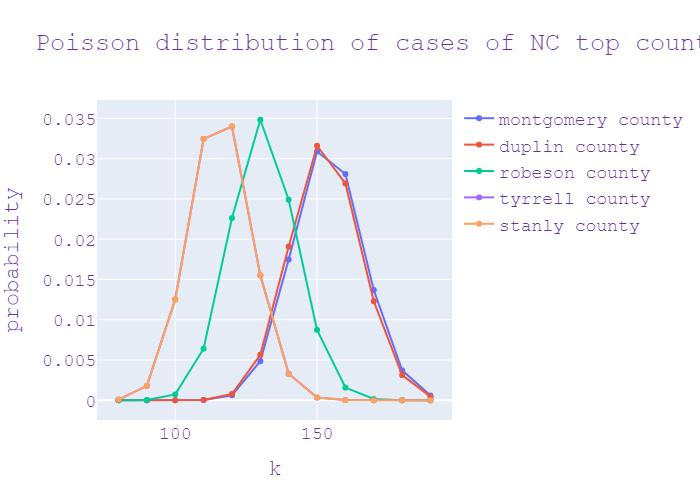

In [1257]:
#Plotting poisson distribution for most affected counties casewise

fig1_poisson_nc_tx = go.Figure()
for lamb,county in zip(nc_county_stats_case['Num of Cases Per Day Normalized'],nc_county_stats_case['County Name']):
    fig1_poisson_nc_tx.add_trace(
        go.Scatter(
            x=list(k),
            y=pf_dict[lamb],  
            name = county
        ))
    fig1_poisson_nc_tx.update_layout(
    title="Poisson distribution of cases of NC top counties",
    xaxis_title="k",
    yaxis_title="probability" ,font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

# fig1_poisson_nc_tx.show()
fig1_poisson_nc_tx.write_image("..images/fig1_poisson_nc_tx.png")
img_bytes = fig1_poisson_nc_tx.to_image(format="png")
Image(img_bytes)

**From the poisson distribution graph of NC state counties,**
- Tyrell and Stanley counties have more probabity of getting 120 cases per day(normalised).
- Duplin and Montgomery states have more probability of getting 150 number of cases per day(normalised).
- Robeson county has more probability of getting 130 cases per day normalised.



In [1258]:
#Displaying the top5 affected counties - deaths
nc_county_stats_death = nc_county_stats.sort_values(['Num of Deaths Per Day Normalized'],ascending=False).head()
nc_county_stats_death

,County Name,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
51,jones county,63.0,5.0
61,montgomery county,154.0,4.0
65,northampton county,84.0,4.0
30,duplin county,153.0,4.0
23,columbus county,96.0,4.0


In [1259]:
#Calculating possion pmf values for each county death mean as lambda and same k values
k=range(0,8,1)
pf_dict = {}
for lamb in nc_county_stats_death['Num of Deaths Per Day Normalized']:
    p_list=[]
    for i in k:
        p=poisson.pmf(k=i,     
        mu=lamb)   
        p_list.append(p)
    pf_dict[lamb]=p_list


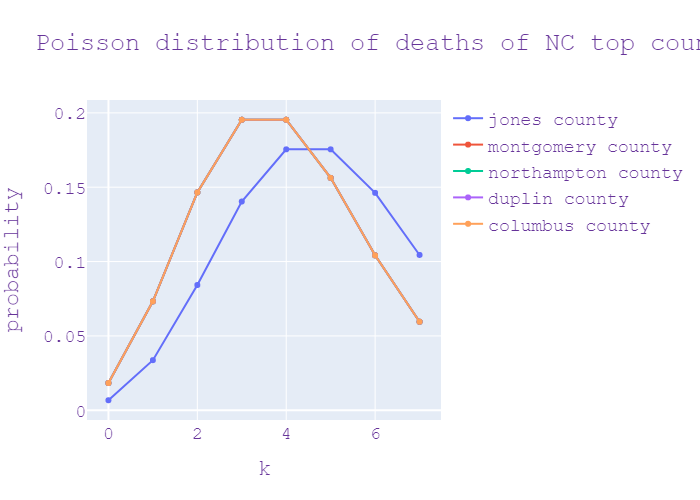

In [1262]:
#Plotting poisson distribution for most affected counties death-wise
fig2_poisson_nc_tx = go.Figure()
for lamb,county in zip(nc_county_stats_death['Num of Deaths Per Day Normalized'],nc_county_stats_death['County Name']):
    fig2_poisson_nc_tx.add_trace(
        go.Scatter(
            x=list(k),
            y=pf_dict[lamb],  
            name = county
        ))
fig2_poisson_nc_tx.update_layout(
    title="Poisson distribution of deaths of NC top counties",
    xaxis_title="k",
    yaxis_title="probability" ,font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

#fig2_poisson_nc_tx.show()
fig2_poisson_nc_tx.write_image("..images/fig2_poisson_nc_tx.png")
img_bytes = fig2_poisson_nc_tx.to_image(format="png")
Image(img_bytes)

**From the poisson distribution graph of NC state counties deaths,**

We cannot see the similar death rate counties as they are overlapped
- Duplin county has more probabity of getting 3 deaths per day(normalised).
- Columbus county has more probability of getting 3-4 deaths per day(normalised).
- Hertford county has more probability of getting 4 deaths per day normalised.
- Vance county has more probability of getting 3-4 deaths per day(normalised).
- Jones county has more probability of getting 4-5 deaths per day(normalised).



### Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

In [1136]:
#Loading the merged employment dataset
covid_emp = pd.read_csv('../data/emp_covid_large.csv')

In [1119]:
#Taking Total Covered employment data as it will have the total employment data of each county in all states
emp_st_ref_data = covid_emp[covid_emp["Ownership"].isin(["Total Covered"])]
emp_st_ref_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Own,Ownership,Industry,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,AL,1001,autauga county,2020-01-22,0,0,55869,0,Total Covered,"10 Total, all industries",910,11085,11047,11070,119509163,831,1.0,1.0
8,AL,1001,autauga county,2020-01-23,0,0,55869,0,Total Covered,"10 Total, all industries",910,11085,11047,11070,119509163,831,1.0,1.0
16,AL,1001,autauga county,2020-01-24,0,0,55869,0,Total Covered,"10 Total, all industries",910,11085,11047,11070,119509163,831,1.0,1.0
24,AL,1001,autauga county,2020-01-25,0,0,55869,0,Total Covered,"10 Total, all industries",910,11085,11047,11070,119509163,831,1.0,1.0
32,AL,1001,autauga county,2020-01-26,0,0,55869,0,Total Covered,"10 Total, all industries",910,11085,11047,11070,119509163,831,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418970,WY,56045,weston county,2020-09-10,21,0,6927,0,Total Covered,"10 Total, all industries",291,2335,2328,2289,24544159,815,1.0,1.0
5418977,WY,56045,weston county,2020-09-11,21,0,6927,0,Total Covered,"10 Total, all industries",291,2335,2328,2289,24544159,815,1.0,1.0
5418984,WY,56045,weston county,2020-09-12,23,0,6927,0,Total Covered,"10 Total, all industries",291,2335,2328,2289,24544159,815,1.0,1.0
5418991,WY,56045,weston county,2020-09-13,23,0,6927,0,Total Covered,"10 Total, all industries",291,2335,2328,2289,24544159,815,1.0,1.0


In [1120]:
#Removing the number of 'Employment Location Quotient Relative to U.S.' and 'Total Wage Location Quotient Relative to U.S.columns
#as their value will be 1 for all the rows as we are taking total industries
emp_st_ref_data.drop(['Own','Employment Location Quotient Relative to U.S.','Total Wage Location Quotient Relative to U.S.'], axis=1, inplace=True)

In [1121]:
emp_st_ref_data.columns

Index(['State', 'countyFIPS', 'County Name', 'Date', 'Num of Cases',
       'Num of Deaths', 'population', 'Ownership', 'Industry',
       'Establishment Count', 'January Employment', 'February Employment',
       'March Employment', 'Total Quarterly Wages', 'Average Weekly Wage'],
      dtype='object')

In [1122]:
#Choosing the last data row in ur dataset as it will have the total number of cases and deaths of each county
emp_st_ref_data = emp_st_ref_data[emp_st_ref_data["Date"].isin(["2020-09-14"])]

In [1123]:
#Grouping by each State to get the total Establishment count and other metrics of each state
f={'Num of Cases':'sum','Num of Deaths':'sum','population':'sum','Establishment Count':'sum','January Employment':'sum', 'February Employment':'sum',
       'March Employment':'sum','Total Quarterly Wages':'sum', 'Average Weekly Wage':'sum','Ownership':'first','Industry':'first'}
emp_grpby = emp_st_ref_data.groupby(['State'],as_index=False).agg(f)

In [1124]:
emp_grpby.head()

,State,Num of Cases,Num of Deaths,population,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Ownership,Industry
0,AL,139455,2353,4903185,117235,1920552,1929715,1927679,24002607642,54147,Total Covered,"10 Total, all industries"
1,AR,68997,992,3017804,81586,1180772,1182978,1181813,14001456314,54863,Total Covered,"10 Total, all industries"
2,AZ,208725,5321,7278717,156795,2928312,2944386,2923633,41449107619,13662,Total Covered,"10 Total, all industries"
3,CA,765454,14467,39512223,1582454,17260403,17401432,17191928,324292509900,62438,Total Covered,"10 Total, all industries"
4,CO,61679,1990,5758736,211575,2711288,2713711,2703689,45020871029,56140,Total Covered,"10 Total, all industries"


In [1125]:
#Calculating the correlation and displaying the heatmap 
corr = emp_grpby.corr()
corr.style.background_gradient(cmap='coolwarm')

,Num of Cases,Num of Deaths,population,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage
Num of Cases,1,0.752177,0.956468,0.910132,0.945886,0.946145,0.946331,0.909189,0.520566
Num of Deaths,0.752177,1,0.738136,0.686228,0.758944,0.758235,0.758637,0.804295,0.286868
population,0.956468,0.738136,1,0.966081,0.99759,0.997659,0.997721,0.971785,0.530955
Establishment Count,0.910132,0.686228,0.966081,1,0.968353,0.96887,0.967919,0.969153,0.373692
January Employment,0.945886,0.758944,0.99759,0.968353,1,0.999995,0.999994,0.983118,0.518564
February Employment,0.946145,0.758235,0.997659,0.96887,0.999995,1,0.99999,0.983197,0.517801
March Employment,0.946331,0.758637,0.997721,0.967919,0.999994,0.99999,1,0.982756,0.520227
Total Quarterly Wages,0.909189,0.804295,0.971785,0.969153,0.983118,0.983197,0.982756,1,0.437176
Average Weekly Wage,0.520566,0.286868,0.530955,0.373692,0.518564,0.517801,0.520227,0.437176,1


**As we can see in the above heatmap, for all the industries,**
- Number of Cases and Establishment count have high positive correlation of 0.91.
- Number of Cases and Total Quarterly Wages have high positive correlation of 0.9.
- Number of Cases and March employment have high positive correlation of 0.94. 
- Number of Deaths and Establishment Count have moderate positive correlation of 0.73.


**Hypothesis :**
- Does higher Establishment Count in a state affect the number of covid cases in that state.
- Does higher Quarterly Wages of a state indicate higher number of cases.
- Does higher Establishment Count in a state affect the number of covid deaths in that state.
- Do high Employment numbers in March affect the number of Covid cases.

**Apart from the above points if we had more months employment data after March, we could give more insights on the cases and deaths as the cases increased tremendously after March in United States**

In [1144]:
#Taking Total Covered employment data as it will have the total employment data of each county in all states
emp_st_ref_data = covid_emp[covid_emp["Ownership"].isin(["Federal Government"])]
emp_st_ref_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Own,Ownership,Industry,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
1,AL,1001,autauga county,2020-01-22,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
9,AL,1001,autauga county,2020-01-23,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
17,AL,1001,autauga county,2020-01-24,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
25,AL,1001,autauga county,2020-01-25,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
33,AL,1001,autauga county,2020-01-26,0,0,55869,1,Federal Government,"10 Total, all industries",10,81,84,85,1073296,991,0.40,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418971,WY,56045,weston county,2020-09-10,21,0,6927,1,Federal Government,"10 Total, all industries",8,47,46,51,646138,1035,1.15,1.09
5418978,WY,56045,weston county,2020-09-11,21,0,6927,1,Federal Government,"10 Total, all industries",8,47,46,51,646138,1035,1.15,1.09
5418985,WY,56045,weston county,2020-09-12,23,0,6927,1,Federal Government,"10 Total, all industries",8,47,46,51,646138,1035,1.15,1.09
5418992,WY,56045,weston county,2020-09-13,23,0,6927,1,Federal Government,"10 Total, all industries",8,47,46,51,646138,1035,1.15,1.09


In [1145]:
#Removing the number of 'Employment Location Quotient Relative to U.S.' and 'Total Wage Location Quotient Relative to U.S.columns
#as their value will be 1 for all the rows as we are taking total industries
emp_st_ref_data.drop(['Own'], axis=1, inplace=True)

In [1146]:
#Choosing the last data row in ur dataset as it will have the total number of cases and deaths of each county
emp_st_ref_data = emp_st_ref_data[emp_st_ref_data["Date"].isin(["2020-09-14"])]

In [1147]:
#Grouping by each State to get the total Establishment count and other metrics of each state
f={'Num of Cases':'sum','Num of Deaths':'sum','population':'sum','Establishment Count':'sum','January Employment':'sum', 'February Employment':'sum',
       'March Employment':'sum','Total Quarterly Wages':'sum', 'Average Weekly Wage':'sum','Ownership':'first','Industry':'first'}
emp_grpby = emp_st_ref_data.groupby(['State'],as_index=False).agg(f)

In [1148]:
#Calculating the correlation and displaying the heatmap 
corr = emp_grpby.corr()
corr.style.background_gradient(cmap='coolwarm')

,Num of Cases,Num of Deaths,population,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage
Num of Cases,1,0.752177,0.956468,0.814014,0.889621,0.890363,0.891078,0.83302,0.501424
Num of Deaths,0.752177,1,0.738136,0.672505,0.641527,0.642259,0.642551,0.601744,0.247103
population,0.956468,0.738136,1,0.882569,0.929162,0.929904,0.930478,0.876412,0.505
Establishment Count,0.814014,0.672505,0.882569,1,0.833677,0.833891,0.834765,0.770406,0.73599
January Employment,0.889621,0.641527,0.929162,0.833677,1,0.999992,0.999964,0.987952,0.510667
February Employment,0.890363,0.642259,0.929904,0.833891,0.999992,1,0.999986,0.987689,0.509915
March Employment,0.891078,0.642551,0.930478,0.834765,0.999964,0.999986,1,0.98722,0.51015
Total Quarterly Wages,0.83302,0.601744,0.876412,0.770406,0.987952,0.987689,0.98722,1,0.449824
Average Weekly Wage,0.501424,0.247103,0.505,0.73599,0.510667,0.509915,0.51015,0.449824,1


**For the Federal Owned Industries,**
- There is a high correlation of 0.8 between Num of Cases and Establishment count.
- March Employment rate has high correlation of 0.89 with Num of Cases.
- Total Quarterly Wages has high correlation of 0.89 with Num of Cases.
- Establishment Count has moderate correlation of 0.67 with Num of Deaths. 


**Hypothesis:**
-  Do states with more Federal establishments in a state have a higher chance of more number of Cases.
-  For states that had higher employment in March in Federal industry do they higher covid case numbers.
-  Do higher paid states with high Total Quarterly Wages in Federal industry in a state indicate more Covid cases.
-  Do more Federal Establishments in a state indicate higher chance of increase in number of deaths.

**Apart from the above points if we had more months employment data after March, we could give more insights on the cases and deaths as the cases increased tremendously after March in United States.**